# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

data = pd.read_csv(file_path)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
print(data.info())

print(data.describe())

print(data.isna())

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, age to charges
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7 non-null      float64
 1   sex       7 non-null      float64
 2   bmi       7 non-null      float64
 3   children  7 non-null      float64
 4   smoker    7 non-null      float64
 5   region    7 non-null      float64
 6   charges   7 non-null      float64
dtypes: float64(7)
memory usage: 748.0+ bytes
None
            age       sex       bmi  children    smoker    region   charges
count  7.000000  7.000000  7.000000  7.000000  7.000000  7.000000  7.000000
mean   0.024469 -0.044066  0.029201 -0.048181  0.109404 -0.052335  0.137693
std    0.455575  0.464419  0.445427  0.464273  0.582162  0.489737  0.586419
min   -0.315763 -0.315763 -0.266123 -0.277806 -0.327057 -0.436522 -0.436522
25%   -0.227145 -0.240954 -0.229240 -0.256854 -0.253628 -0.294052 -0.269250
50%   -0.156519 -0.198810 -0.107899 -0.

In [3]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes

data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

data['region'] = data['region'].astype('category')
data['region'] = data['region'].cat.codes

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [27]:
# List of columns to convert to categorical codes
categorical_columns = ['sex', 'smoker', 'region']

# Convert specified columns to categorical and then to codes
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category').cat.codes)

data

,age,sex,bmi,children,smoker,region,charges,Color_Codes
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


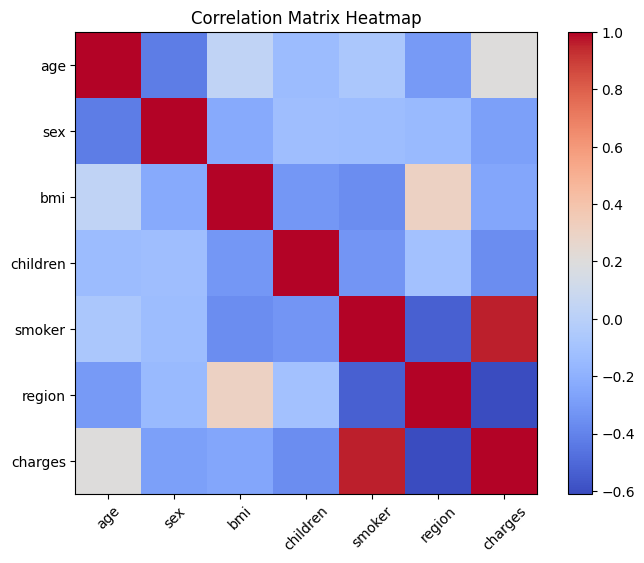

In [10]:
data_corralation = data.corr()

data_corralation

# Create a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(data_corralation, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Add labels to the heatmap
plt.xticks(range(len(data_corralation.columns)), data_corralation.columns, rotation=45)
plt.yticks(range(len(data_corralation.index)), data_corralation.index)

# Add title
plt.title('Correlation Matrix Heatmap')

plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

x = data.drop(["charges"], axis=1)
y = data.loc[:, ["charges"]]

Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = .20, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)

print("mse:", mse)
print("score:", score)


mse: 33635210.43117845
score: 0.7833463107364536
